In [21]:


import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [22]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# Define the path to your dataset
file_path = 'twitter_training.csv'

# Load data
column_names = ['id', 'topic', 'sentiment', 'text']
data = pd.read_csv(file_path, names=column_names)
data.drop('id', axis=1, inplace=True)

# Show sentiment value counts
print(data['sentiment'].value_counts())


sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [24]:
data.dropna(inplace=True)

In [25]:
# Data Preprocessing
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Removing the punctuation, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I | re.A)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = text.split()
    
    # Remove stop words and do stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [26]:
data['preprocessed_text'] = data['text'].apply(preprocess_text)
print(data[['text', 'preprocessed_text']].head())


                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

           preprocessed_text  
0   im get borderland murder  
1           come border kill  
2     im get borderland kill  
3  im come borderland murder  
4   im get borderland murder  


In [27]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['preprocessed_text'])
y = data['sentiment']
print(X.shape, y.shape)


(73996, 5000) (73996,)


In [28]:
# Data Validation and Decision Tree Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [29]:
clf = DecisionTreeClassifier(criterion='gini', splitter='random')
clf.fit(X_train, y_train)


DecisionTreeClassifier(splitter='random')

0.781296454795261


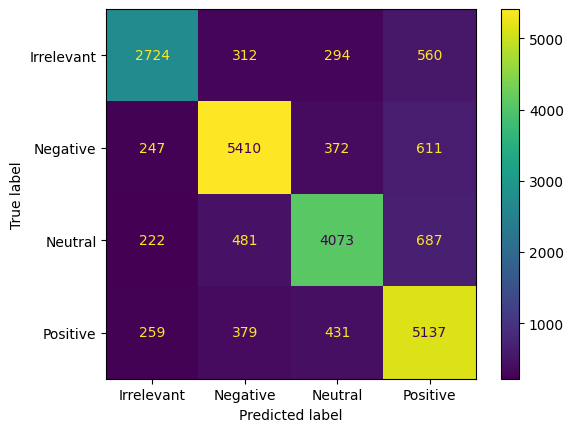

In [30]:
# Model evaluation
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [31]:
# Function to predict sentiment of a given text
def predict_sentiment(text):
    preprocessed_text = preprocess_text(text)
    X_new = vectorizer.transform([preprocessed_text])
    predicted_sentiment = clf.predict(X_new)
    print("Predicted sentiment:", predicted_sentiment)

In [32]:
# Test the prediction function
predict_sentiment("I am feeling very happy today")
predict_sentiment("Its beyond me")
predict_sentiment("Die you son of something")
predict_sentiment("Nvidia is a Giant Company")

Predicted sentiment: ['Positive']
Predicted sentiment: ['Positive']
Predicted sentiment: ['Neutral']
Predicted sentiment: ['Neutral']


In [33]:
# Test the prediction function with various statements
predict_sentiment("This is the best day ever!")
predict_sentiment("I am extremely dissatisfied with the service.")
predict_sentiment("What an amazing experience!")
predict_sentiment("I can't stand this anymore.")
predict_sentiment("The product quality is outstanding.")
predict_sentiment("I am very disappointed in this purchase.")
predict_sentiment("The event was a huge success.")
predict_sentiment("I regret buying this item.")
predict_sentiment("Customer service was very helpful and friendly.")
predict_sentiment("This is a complete waste of money.")
predict_sentiment("I'm so excited about the new project!")
predict_sentiment("This is so frustrating and annoying.")
predict_sentiment("The food was absolutely delicious.")
predict_sentiment("I had a terrible experience with the airline.")
predict_sentiment("Everything is just perfect!")
predict_sentiment("I would never recommend this to anyone.")
predict_sentiment("The weather today is just awful.")
predict_sentiment("I'm feeling great about my progress.")
predict_sentiment("The movie was a total disappointment.")
predict_sentiment("I'm thrilled with the results.")


Predicted sentiment: ['Positive']
Predicted sentiment: ['Positive']
Predicted sentiment: ['Positive']
Predicted sentiment: ['Negative']
Predicted sentiment: ['Neutral']
Predicted sentiment: ['Negative']
Predicted sentiment: ['Neutral']
Predicted sentiment: ['Neutral']
Predicted sentiment: ['Negative']
Predicted sentiment: ['Negative']
Predicted sentiment: ['Positive']
Predicted sentiment: ['Negative']
Predicted sentiment: ['Negative']
Predicted sentiment: ['Positive']
Predicted sentiment: ['Positive']
Predicted sentiment: ['Positive']
Predicted sentiment: ['Negative']
Predicted sentiment: ['Positive']
Predicted sentiment: ['Negative']
Predicted sentiment: ['Positive']


In [34]:
# Required libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Convert categorical labels to numerical values for error calculation
true_labels = y_test.replace({'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3})
predicted_labels = pd.Series(y_pred).replace({'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3})

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(true_labels, predicted_labels)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(true_labels, predicted_labels)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 0.7173746565160593
Mean Absolute Error (MAE): 0.36033154646605703
Root Mean Squared Error (RMSE): 0.8469797261540911


C:\Users\Hari\AppData\Local\Temp\ipykernel_11756\1009015658.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  true_labels = y_test.replace({'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3})
C:\Users\Hari\AppData\Local\Temp\ipykernel_11756\1009015658.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predicted_labels = pd.Series(y_pred).replace({'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3})


In [35]:
predict_sentiment("Im feeling great today")

Predicted sentiment: ['Positive']
